In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Credits: The diabetes dataset was originated from UCI Machine Learning Repository.

### Data Understanding

In [2]:
df = pd.read_csv('diabetes.csv')

### Number of rows and columns

In [5]:
rows,col=df.shape
print('the no of rows are',rows)
print('the number of columns are',col)

the no of rows are 768
the number of columns are 9


### Data Types of variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### five-point summary for numerical variables

In [10]:
df.describe().iloc[3:,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0.0,0.00,0.0,0.0,0.00,0.0,0.07800,21.0,0.0
25%,1.0,99.00,62.0,0.0,0.00,27.3,0.24375,24.0,0.0
50%,3.0,117.00,72.0,23.0,30.50,32.0,0.37250,29.0,0.0
75%,6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0
max,17.0,199.00,122.0,99.0,846.00,67.1,2.42000,81.0,1.0


### Checking for Null Values

In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Observation:
There are no Null values.

### Check for Outliers

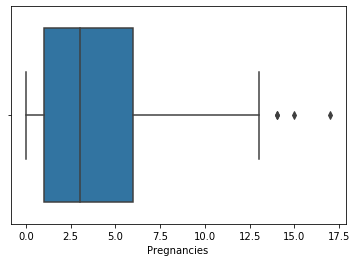

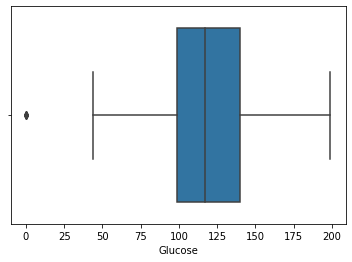

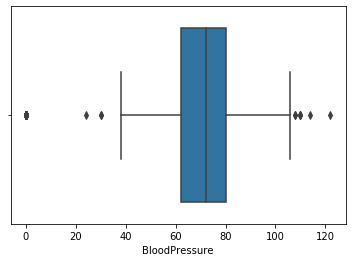

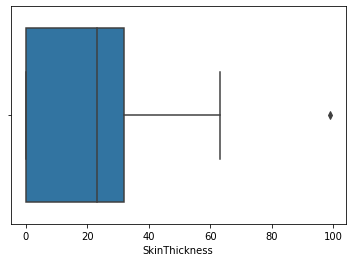

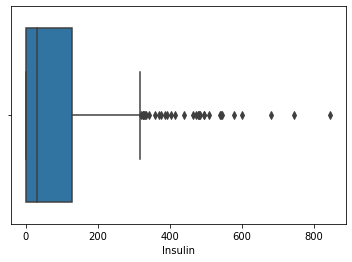

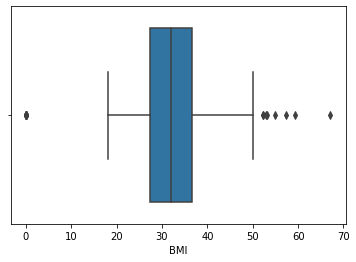

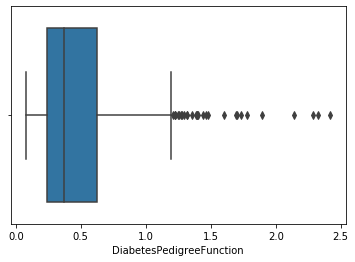

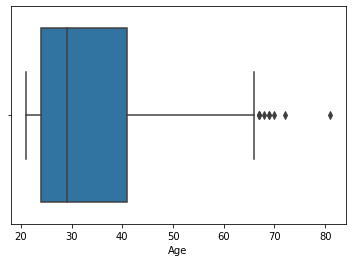

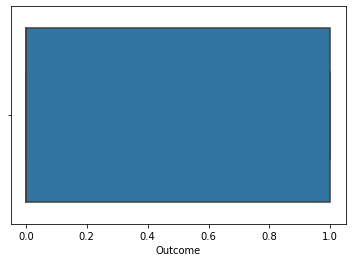

In [18]:
#check for outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### check for class imbalance

In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

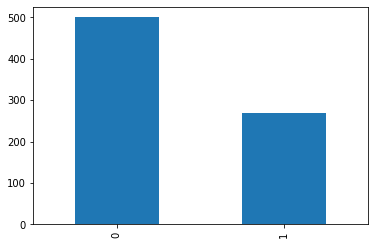

In [21]:
df['Outcome'].value_counts().plot('bar')
plt.show()

### Observation:
There is no such case of imbalance in the data.

### There are few columns which have to be treated for outliers. Others columns outliers are not that worse to be treated.

In [16]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3-Q1
IQR

127.25

In [17]:
#Upper Limit
UL = Q3+(1.5*IQR)
UL

318.125

In [18]:
#Lower Limit
LL = Q1-(1.5*IQR)
LL

-190.875

In [19]:
#List of Outliers present
df[(df['Insulin']>UL) | (df['Insulin']<LL)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [20]:
df[(df['Insulin']>UL) | (df['Insulin']<LL)].count()['Insulin']

34

In [21]:
# Clean Dataframe with the above outliers removed
df1 = df[(df['Insulin']<=UL) & (df['Insulin']>=LL)]

In [22]:
df1.shape # df1 with 34 outliers removed

(734, 9)

In [23]:
df.shape # orginal df

(768, 9)

### Glucose, BMI, Blood Pressure have some values as zeroes. These values can't be zero for a human. So will handle them.

In [24]:
df1[df1['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [25]:
df1['Glucose'] = df1['Glucose'].replace(0,np.nan)

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df1['Glucose'] = df1['Glucose'].fillna(df1['Glucose'].median())

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df1['BMI'] = df1['BMI'].replace(0,np.nan)

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df1['BMI'] = df1['BMI'].fillna(df1['BMI'].median())

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1['BloodPressure'] = df1['BloodPressure'].replace(0,np.nan)

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df1['BloodPressure'] = df1['BloodPressure'].fillna(df1['BloodPressure'].median())

C:\Users\Jayasuryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Checking the correlation of Independent variables with the Target variable.

In [32]:
df1.corr()['Outcome']

Pregnancies                 0.223300
Glucose                     0.492522
BloodPressure               0.175250
SkinThickness               0.054106
Insulin                     0.088944
BMI                         0.319188
DiabetesPedigreeFunction    0.183005
Age                         0.231023
Outcome                     1.000000
Name: Outcome, dtype: float64

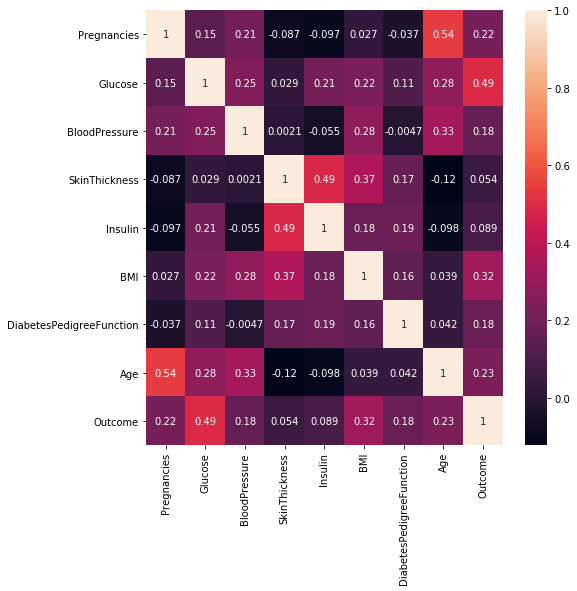

In [61]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Observation:
'Glucose' is the higly correlated feature among all the others, for the variable 'Outcome'(Target).

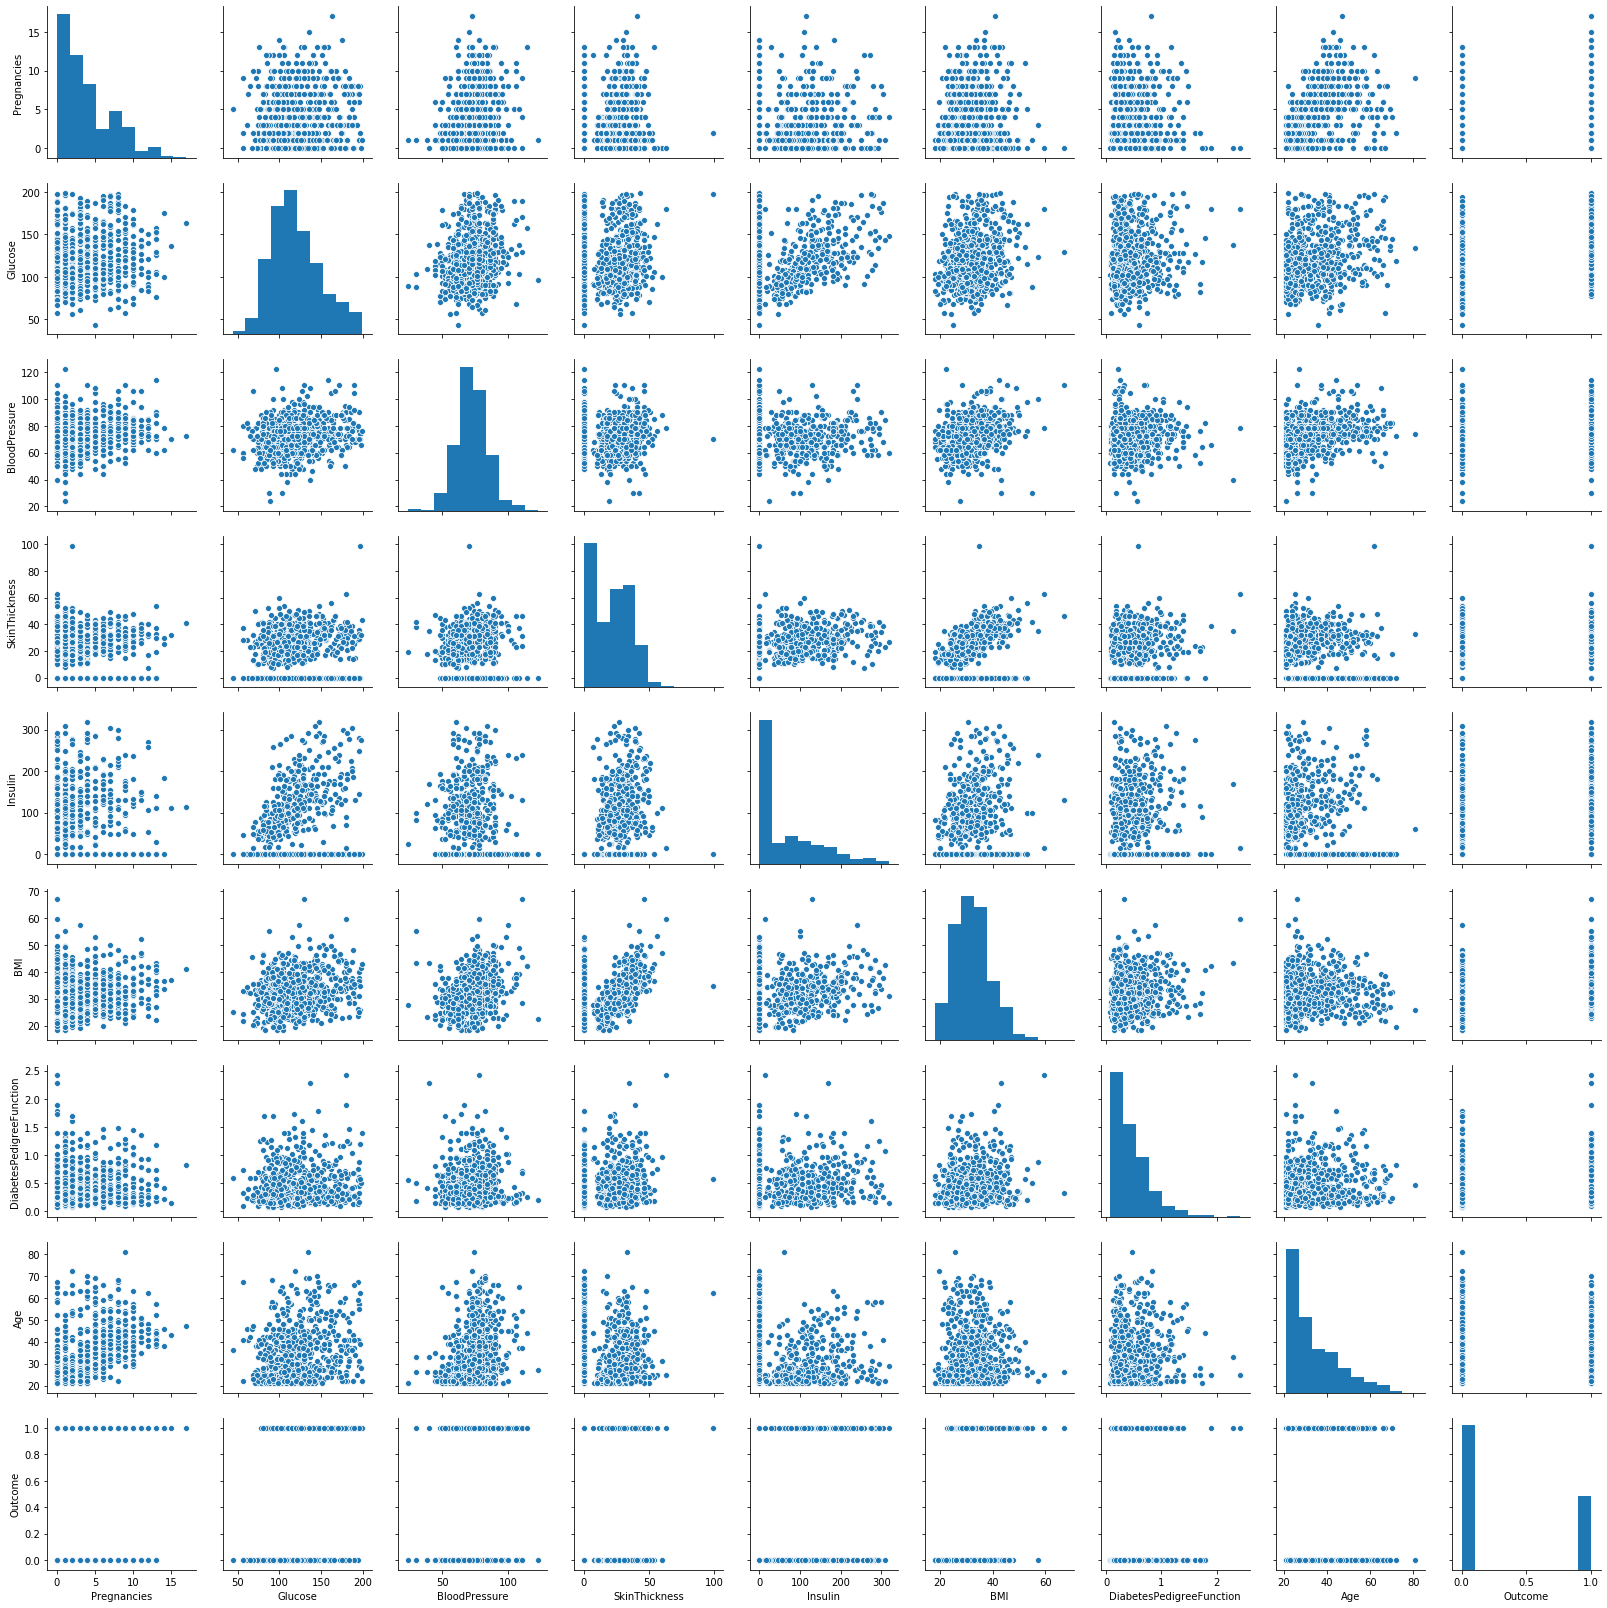

In [33]:
sns.pairplot(df1)
plt.show()

In [ ]:
This pairplot shows significance of each and every feature.

In [67]:
df1 = df1.drop('SkinThickness',axis=1)

In [68]:
df1.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,0,33.6,0.627,50,1
1,1,85.0,66.0,0,26.6,0.351,31,0
2,8,183.0,64.0,0,23.3,0.672,32,1
3,1,89.0,66.0,94,28.1,0.167,21,0
4,0,137.0,40.0,168,43.1,2.288,33,1


### Observation:
SkinThickness plays the least role(0.054) with the target variable. Hence the column is being dropped.

In [35]:
X = df1.drop('Outcome',axis=1)
y = df1['Outcome']

In [77]:
Xc = sm.add_constant(X)

In [71]:
import statsmodels.api as sm

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [78]:
[vif(Xc.values, i) for i in range(Xc.shape[1])]

[52.70199691262508,
 1.4237887611182036,
 1.2249833151894507,
 1.2630836967232184,
 1.1392322871673393,
 1.1815162639718428,
 1.0662696103424392,
 1.6155398495126505]

### Observation:
There is no Multicollinearity present between the variables. So no more dropping of variables.

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
np.mean(X_train)

Pregnancies                   3.828460
Glucose                     119.393762
BloodPressure                72.545809
SkinThickness                20.025341
Insulin                      60.699805
BMI                          32.502729
DiabetesPedigreeFunction      0.464322
Age                          33.167641
dtype: float64

In [38]:
np.mean(X_test)

Pregnancies                   3.873303
Glucose                     121.294118
BloodPressure                72.140271
SkinThickness                19.891403
Insulin                      66.108597
BMI                          31.941176
DiabetesPedigreeFunction      0.472946
Age                          33.226244
dtype: float64

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(513, 8)
(221, 8)
(513,)
(221,)


With respect to mean for the both train and test we can see that for the both mean values are almost similar hence the splitting has been done in the right manner. In addition from the shape option we can get to know the shape of the train and test.

### Fitting the model

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtc = DecisionTreeClassifier()

In [83]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Reason for selecting the ML model : Decision Tree is one of the popular machine learning methods in the medical field domain, and has grateful classification power. Since our dataset is diabetes, I chose this method.

In [86]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [87]:
train_prob = dtc.predict_proba(X_train)[:,1]
train_pred = dtc.predict(X_train)

In [88]:
print('Accuracy score on Train:', accuracy_score(y_train, train_pred))

Accuracy score on Train: 1.0


In [89]:
test_prob = dtc.predict_proba(X_test)[:,1]
test_pred = dtc.predict(X_test)

In [90]:
print('Accuracy score on Test:', accuracy_score(y_test, test_pred))

Accuracy score on Test: 0.7239819004524887


### Observation: 
Seems like the model has been Overfit (Train data has been learnt thoroughly,because of this, it expects the same pattern in test, and failed).

In [91]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       173

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513



In [92]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       145
           1       0.59      0.63      0.61        76

    accuracy                           0.72       221
   macro avg       0.70      0.70      0.70       221
weighted avg       0.73      0.72      0.73       221



### Observation: 
The report shows the classification metrics precision, recall and f1-score on a per-class basis.

The metrics are calculated by using true and false positives, true and false negatives.

Precision shows the accuracy of positive predictions.
Recall shows the fraction of positives that were correctly identified.



In [93]:
# The model should be undergone with Hyper Parameter tuning either by Grid or Random Search

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
dtc = DecisionTreeClassifier()

In [95]:
# choosing the parameters in random, we will revist if we don't get the best parameters
max_depth = [2,3,4,5,6,7,8]
min_samples_split = [2,3,4,5,6,7,8,9,10]
min_samples_leaf = [6,7,8,9,10,11,12,13,14,15]
criteria = ['gini','entropy']

params = {'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
              'criterion':criteria}

In [96]:
gsearch = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', cv=3, n_jobs= -1)

In [97]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                  

In [99]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 8}

In [100]:
# Using the best parameters to fit the model again
dtc = DecisionTreeClassifier(**gsearch.best_params_)

In [101]:
dtc.fit(X_train, y_train)

y_train_prob = dtc.predict_proba(X_train)[:,1]
y_train_pred = dtc.predict(X_train)

print('Accuracy score on Train:', accuracy_score(y_train, y_train_pred))
print('Confusion Matrix on Train:')
print(confusion_matrix(y_train, y_train_pred))
print('AUC of Train:', roc_auc_score(y_train,y_train_prob))

Accuracy score on Train: 0.8187134502923976
Confusion Matrix on Train:
[[290  50]
 [ 43 130]]
AUC of Train: 0.8997109826589595


In [103]:
y_test_prob = dtc.predict_proba(X_test)[:,1]
y_test_pred = dtc.predict(X_test)

print('Accuracy score on Test:', accuracy_score(y_test, y_test_pred))
print('Confusion Matrix on Test:')
print(confusion_matrix(y_test, y_test_pred))
print('AUC of Test:', roc_auc_score(y_test,y_test_prob))

Accuracy score on Test: 0.7420814479638009
Confusion Matrix on Test:
[[114  31]
 [ 26  50]]
AUC of Test: 0.8168784029038113


### Observation:
Now Train and Test results seems much better than before, being treated. 